In [1]:
# Initial imports
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Load the Plant_DBcopy.csv dataset.
file_path = "db_test_20211119.csv"
plants_df = pd.read_csv(file_path, index_col=0,encoding='latin1')
plants_df

División          clase        orden  familia  genero       Tipo  \
ID                                                                              
123147  Magnoliophyta  Magnoliopsida  Papaverales       49      62    Arbusto   
127641  Magnoliophyta  Magnoliopsida  Polygonales       60     579    Hierba    
103071  Magnoliophyta  Magnoliopsida     Lamiales        1     616    Hierba    
95344   Magnoliophyta  Magnoliopsida  Gentianales        9      71  Sufrútice   
98712   Magnoliophyta  Magnoliopsida  Gentianales        9     631  Sufrútice   
...               ...            ...          ...      ...     ...        ...   
67410   Magnoliophyta  Magnoliopsida    Asterales       17     681    Hierba    
8379    Magnoliophyta     Liliopsida    Cyperales       29     215    Hierba    
94265   Magnoliophyta  Magnoliopsida     Ebenales       76     654      Árbol   
33282   Magnoliophyta     Liliopsida       Poales       57     496    Hierba    
4588    Magnoliophyta     Liliopsida  Asparagales       15     767      Árbol   

        Color                       colector numerocatalogo  numerocolecta  \
ID                                                                           
123147      1              B. Hinton; et al.         137410          21123   
127641      7            Abel García Arévalo           1100           3255   
103071      7                 J.A. Zavala H.           1229            113   
95344       7  J. J. Balleza C.; M. Adame G.  NO DISPONIBLE          15297   
98712       7   I. M. Johnston; C. H. Muller         155345            961   
...       ...                            ...            ...            ...   
67410       7                       JCH; GSH  NO DISPONIBLE          22108   
8379        2                  NO DISPONIBLE         784296  NO DISPONIBLE   
94265      12                J. Rzedowski R.          48698          34843   
33282      11                    A. Preciado           6020            208   
4588        2       Leuenberger, Beat Ernest         275250           2568   

       siglascoleccion    pais                estado  \
ID                                                     
123147             IEB  MEXICO            NUEVO LEON   
127641          CIIDIR  MEXICO               DURANGO   
103071             XAL  MEXICO                PUEBLA   
95344             HUAZ  MEXICO             ZACATECAS   
98712               LL  MEXICO  COAHUILA DE ZARAGOZA   
...                ...     ...                   ...   
67410              GBH  MEXICO            TAMAULIPAS   
8379              MEXU  MEXICO                PUEBLA   
94265             ENCB  MEXICO                OAXACA   
33282             COCA  MEXICO       BAJA CALIFORNIA   
4588              MEXU  MEXICO                PUEBLA   

                       municipio  longitud  latitud  altitudmapa     zonamapa  
ID                                                                             
123147                   GALEANA   -100.77    24.57       1843.0  CONTINENTAL  
127641                TLAHUALILO   -103.75    26.68       1186.0  CONTINENTAL  
103071                ZAPOTITLAN    -97.49    18.34       1609.0  CONTINENTAL  
95344              GENARO CODINA   -102.45    22.48       2223.0  CONTINENTAL  
98712                     OCAMPO   -103.30    27.59       1236.0  CONTINENTAL  
...                          ...       ...      ...          ...          ...  
67410                    JAUMAVE    -99.44    23.58        910.0  CONTINENTAL  
8379                    CALTEPEC    -97.45    18.17       2249.0  CONTINENTAL  
94265   VILLA DE CHILAPA DE DIAZ    -97.63    17.68       2096.0  CONTINENTAL  
33282                   ENSENADA   -115.76    31.68       1405.0  CONTINENTAL  
4588                  ZAPOTITLAN    -97.63    18.23       1963.0  CONTINENTAL  

[3982 rows x 18 columns]

In [3]:
# Remove rows that have at least 1 null value.
plants_df = plants_df.dropna(how='any',axis=0) 
plants_df

División          clase        orden  familia  genero       Tipo  \
ID                                                                              
123147  Magnoliophyta  Magnoliopsida  Papaverales       49      62    Arbusto   
127641  Magnoliophyta  Magnoliopsida  Polygonales       60     579    Hierba    
103071  Magnoliophyta  Magnoliopsida     Lamiales        1     616    Hierba    
95344   Magnoliophyta  Magnoliopsida  Gentianales        9      71  Sufrútice   
98712   Magnoliophyta  Magnoliopsida  Gentianales        9     631  Sufrútice   
...               ...            ...          ...      ...     ...        ...   
67410   Magnoliophyta  Magnoliopsida    Asterales       17     681    Hierba    
8379    Magnoliophyta     Liliopsida    Cyperales       29     215    Hierba    
94265   Magnoliophyta  Magnoliopsida     Ebenales       76     654      Árbol   
33282   Magnoliophyta     Liliopsida       Poales       57     496    Hierba    
4588    Magnoliophyta     Liliopsida  Asparagales       15     767      Árbol   

        Color                       colector numerocatalogo  numerocolecta  \
ID                                                                           
123147      1              B. Hinton; et al.         137410          21123   
127641      7            Abel García Arévalo           1100           3255   
103071      7                 J.A. Zavala H.           1229            113   
95344       7  J. J. Balleza C.; M. Adame G.  NO DISPONIBLE          15297   
98712       7   I. M. Johnston; C. H. Muller         155345            961   
...       ...                            ...            ...            ...   
67410       7                       JCH; GSH  NO DISPONIBLE          22108   
8379        2                  NO DISPONIBLE         784296  NO DISPONIBLE   
94265      12                J. Rzedowski R.          48698          34843   
33282      11                    A. Preciado           6020            208   
4588        2       Leuenberger, Beat Ernest         275250           2568   

       siglascoleccion    pais                estado  \
ID                                                     
123147             IEB  MEXICO            NUEVO LEON   
127641          CIIDIR  MEXICO               DURANGO   
103071             XAL  MEXICO                PUEBLA   
95344             HUAZ  MEXICO             ZACATECAS   
98712               LL  MEXICO  COAHUILA DE ZARAGOZA   
...                ...     ...                   ...   
67410              GBH  MEXICO            TAMAULIPAS   
8379              MEXU  MEXICO                PUEBLA   
94265             ENCB  MEXICO                OAXACA   
33282             COCA  MEXICO       BAJA CALIFORNIA   
4588              MEXU  MEXICO                PUEBLA   

                       municipio  longitud  latitud  altitudmapa     zonamapa  
ID                                                                             
123147                   GALEANA   -100.77    24.57       1843.0  CONTINENTAL  
127641                TLAHUALILO   -103.75    26.68       1186.0  CONTINENTAL  
103071                ZAPOTITLAN    -97.49    18.34       1609.0  CONTINENTAL  
95344              GENARO CODINA   -102.45    22.48       2223.0  CONTINENTAL  
98712                     OCAMPO   -103.30    27.59       1236.0  CONTINENTAL  
...                          ...       ...      ...          ...          ...  
67410                    JAUMAVE    -99.44    23.58        910.0  CONTINENTAL  
8379                    CALTEPEC    -97.45    18.17       2249.0  CONTINENTAL  
94265   VILLA DE CHILAPA DE DIAZ    -97.63    17.68       2096.0  CONTINENTAL  
33282                   ENSENADA   -115.76    31.68       1405.0  CONTINENTAL  
4588                  ZAPOTITLAN    -97.63    18.23       1963.0  CONTINENTAL  

[3958 rows x 18 columns]

In [4]:
# Remove the "colector" column. 
plants_df.drop("colector", axis= 1, inplace = True)
plants_df.head()

C:\Users\aecm0\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


División          clase        orden  familia  genero       Tipo  \
ID                                                                              
123147  Magnoliophyta  Magnoliopsida  Papaverales       49      62    Arbusto   
127641  Magnoliophyta  Magnoliopsida  Polygonales       60     579    Hierba    
103071  Magnoliophyta  Magnoliopsida     Lamiales        1     616    Hierba    
95344   Magnoliophyta  Magnoliopsida  Gentianales        9      71  Sufrútice   
98712   Magnoliophyta  Magnoliopsida  Gentianales        9     631  Sufrútice   

        Color numerocatalogo numerocolecta siglascoleccion    pais  \
ID                                                                   
123147      1         137410         21123             IEB  MEXICO   
127641      7           1100          3255          CIIDIR  MEXICO   
103071      7           1229           113             XAL  MEXICO   
95344       7  NO DISPONIBLE         15297            HUAZ  MEXICO   
98712       7         155345           961              LL  MEXICO   

                      estado      municipio  longitud  latitud  altitudmapa  \
ID                                                                            
123147            NUEVO LEON        GALEANA   -100.77    24.57       1843.0   
127641               DURANGO     TLAHUALILO   -103.75    26.68       1186.0   
103071                PUEBLA     ZAPOTITLAN    -97.49    18.34       1609.0   
95344              ZACATECAS  GENARO CODINA   -102.45    22.48       2223.0   
98712   COAHUILA DE ZARAGOZA         OCAMPO   -103.30    27.59       1236.0   

           zonamapa  
ID                   
123147  CONTINENTAL  
127641  CONTINENTAL  
103071  CONTINENTAL  
95344   CONTINENTAL  
98712   CONTINENTAL

In [5]:
# Remove the "Color" column. 
plants_df.drop("Color", axis= 1, inplace = True)
plants_df.head()

C:\Users\aecm0\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


División          clase        orden  familia  genero       Tipo  \
ID                                                                              
123147  Magnoliophyta  Magnoliopsida  Papaverales       49      62    Arbusto   
127641  Magnoliophyta  Magnoliopsida  Polygonales       60     579    Hierba    
103071  Magnoliophyta  Magnoliopsida     Lamiales        1     616    Hierba    
95344   Magnoliophyta  Magnoliopsida  Gentianales        9      71  Sufrútice   
98712   Magnoliophyta  Magnoliopsida  Gentianales        9     631  Sufrútice   

       numerocatalogo numerocolecta siglascoleccion    pais  \
ID                                                            
123147         137410         21123             IEB  MEXICO   
127641           1100          3255          CIIDIR  MEXICO   
103071           1229           113             XAL  MEXICO   
95344   NO DISPONIBLE         15297            HUAZ  MEXICO   
98712          155345           961              LL  MEXICO   

                      estado      municipio  longitud  latitud  altitudmapa  \
ID                                                                            
123147            NUEVO LEON        GALEANA   -100.77    24.57       1843.0   
127641               DURANGO     TLAHUALILO   -103.75    26.68       1186.0   
103071                PUEBLA     ZAPOTITLAN    -97.49    18.34       1609.0   
95344              ZACATECAS  GENARO CODINA   -102.45    22.48       2223.0   
98712   COAHUILA DE ZARAGOZA         OCAMPO   -103.30    27.59       1236.0   

           zonamapa  
ID                   
123147  CONTINENTAL  
127641  CONTINENTAL  
103071  CONTINENTAL  
95344   CONTINENTAL  
98712   CONTINENTAL

In [6]:
# Remove the "numerocatalogo" column. 
plants_df.drop("numerocatalogo", axis= 1, inplace = True)
plants_df.head()

C:\Users\aecm0\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


División          clase        orden  familia  genero       Tipo  \
ID                                                                              
123147  Magnoliophyta  Magnoliopsida  Papaverales       49      62    Arbusto   
127641  Magnoliophyta  Magnoliopsida  Polygonales       60     579    Hierba    
103071  Magnoliophyta  Magnoliopsida     Lamiales        1     616    Hierba    
95344   Magnoliophyta  Magnoliopsida  Gentianales        9      71  Sufrútice   
98712   Magnoliophyta  Magnoliopsida  Gentianales        9     631  Sufrútice   

       numerocolecta siglascoleccion    pais                estado  \
ID                                                                   
123147         21123             IEB  MEXICO            NUEVO LEON   
127641          3255          CIIDIR  MEXICO               DURANGO   
103071           113             XAL  MEXICO                PUEBLA   
95344          15297            HUAZ  MEXICO             ZACATECAS   
98712            961              LL  MEXICO  COAHUILA DE ZARAGOZA   

            municipio  longitud  latitud  altitudmapa     zonamapa  
ID                                                                  
123147        GALEANA   -100.77    24.57       1843.0  CONTINENTAL  
127641     TLAHUALILO   -103.75    26.68       1186.0  CONTINENTAL  
103071     ZAPOTITLAN    -97.49    18.34       1609.0  CONTINENTAL  
95344   GENARO CODINA   -102.45    22.48       2223.0  CONTINENTAL  
98712          OCAMPO   -103.30    27.59       1236.0  CONTINENTAL

In [7]:
# Remove the "División" column. 
plants_df.drop("División", axis= 1, inplace = True)
plants_df.head()

C:\Users\aecm0\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


clase        orden  familia  genero       Tipo numerocolecta  \
ID                                                                             
123147  Magnoliopsida  Papaverales       49      62    Arbusto         21123   
127641  Magnoliopsida  Polygonales       60     579    Hierba           3255   
103071  Magnoliopsida     Lamiales        1     616    Hierba            113   
95344   Magnoliopsida  Gentianales        9      71  Sufrútice         15297   
98712   Magnoliopsida  Gentianales        9     631  Sufrútice           961   

       siglascoleccion    pais                estado      municipio  longitud  \
ID                                                                              
123147             IEB  MEXICO            NUEVO LEON        GALEANA   -100.77   
127641          CIIDIR  MEXICO               DURANGO     TLAHUALILO   -103.75   
103071             XAL  MEXICO                PUEBLA     ZAPOTITLAN    -97.49   
95344             HUAZ  MEXICO             ZACATECAS  GENARO CODINA   -102.45   
98712               LL  MEXICO  COAHUILA DE ZARAGOZA         OCAMPO   -103.30   

        latitud  altitudmapa     zonamapa  
ID                                         
123147    24.57       1843.0  CONTINENTAL  
127641    26.68       1186.0  CONTINENTAL  
103071    18.34       1609.0  CONTINENTAL  
95344     22.48       2223.0  CONTINENTAL  
98712     27.59       1236.0  CONTINENTAL

In [8]:
# Remove the "clase" column. 
plants_df.drop("clase", axis= 1, inplace = True)
plants_df.head()

C:\Users\aecm0\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


orden  familia  genero       Tipo numerocolecta siglascoleccion  \
ID                                                                              
123147  Papaverales       49      62    Arbusto         21123             IEB   
127641  Polygonales       60     579    Hierba           3255          CIIDIR   
103071     Lamiales        1     616    Hierba            113             XAL   
95344   Gentianales        9      71  Sufrútice         15297            HUAZ   
98712   Gentianales        9     631  Sufrútice           961              LL   

          pais                estado      municipio  longitud  latitud  \
ID                                                                       
123147  MEXICO            NUEVO LEON        GALEANA   -100.77    24.57   
127641  MEXICO               DURANGO     TLAHUALILO   -103.75    26.68   
103071  MEXICO                PUEBLA     ZAPOTITLAN    -97.49    18.34   
95344   MEXICO             ZACATECAS  GENARO CODINA   -102.45    22.48   
98712   MEXICO  COAHUILA DE ZARAGOZA         OCAMPO   -103.30    27.59   

        altitudmapa     zonamapa  
ID                                
123147       1843.0  CONTINENTAL  
127641       1186.0  CONTINENTAL  
103071       1609.0  CONTINENTAL  
95344        2223.0  CONTINENTAL  
98712        1236.0  CONTINENTAL

In [9]:
# Remove the "orden" column. 
plants_df.drop("orden", axis= 1, inplace = True)
plants_df.head()

C:\Users\aecm0\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


familia  genero       Tipo numerocolecta siglascoleccion    pais  \
ID                                                                         
123147       49      62    Arbusto         21123             IEB  MEXICO   
127641       60     579    Hierba           3255          CIIDIR  MEXICO   
103071        1     616    Hierba            113             XAL  MEXICO   
95344         9      71  Sufrútice         15297            HUAZ  MEXICO   
98712         9     631  Sufrútice           961              LL  MEXICO   

                      estado      municipio  longitud  latitud  altitudmapa  \
ID                                                                            
123147            NUEVO LEON        GALEANA   -100.77    24.57       1843.0   
127641               DURANGO     TLAHUALILO   -103.75    26.68       1186.0   
103071                PUEBLA     ZAPOTITLAN    -97.49    18.34       1609.0   
95344              ZACATECAS  GENARO CODINA   -102.45    22.48       2223.0   
98712   COAHUILA DE ZARAGOZA         OCAMPO   -103.30    27.59       1236.0   

           zonamapa  
ID                   
123147  CONTINENTAL  
127641  CONTINENTAL  
103071  CONTINENTAL  
95344   CONTINENTAL  
98712   CONTINENTAL

In [10]:
# Remove the "numerocolecta" column. 
plants_df.drop("numerocolecta", axis= 1, inplace = True)
plants_df.head()

C:\Users\aecm0\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


familia  genero       Tipo siglascoleccion    pais  \
ID                                                           
123147       49      62    Arbusto             IEB  MEXICO   
127641       60     579    Hierba           CIIDIR  MEXICO   
103071        1     616    Hierba              XAL  MEXICO   
95344         9      71  Sufrútice            HUAZ  MEXICO   
98712         9     631  Sufrútice              LL  MEXICO   

                      estado      municipio  longitud  latitud  altitudmapa  \
ID                                                                            
123147            NUEVO LEON        GALEANA   -100.77    24.57       1843.0   
127641               DURANGO     TLAHUALILO   -103.75    26.68       1186.0   
103071                PUEBLA     ZAPOTITLAN    -97.49    18.34       1609.0   
95344              ZACATECAS  GENARO CODINA   -102.45    22.48       2223.0   
98712   COAHUILA DE ZARAGOZA         OCAMPO   -103.30    27.59       1236.0   

           zonamapa  
ID                   
123147  CONTINENTAL  
127641  CONTINENTAL  
103071  CONTINENTAL  
95344   CONTINENTAL  
98712   CONTINENTAL

In [11]:
# Remove the "siglascoleccion" column. 
plants_df.drop("siglascoleccion", axis= 1, inplace = True)
plants_df.head()

C:\Users\aecm0\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


familia  genero       Tipo    pais                estado  \
ID                                                                 
123147       49      62    Arbusto  MEXICO            NUEVO LEON   
127641       60     579    Hierba   MEXICO               DURANGO   
103071        1     616    Hierba   MEXICO                PUEBLA   
95344         9      71  Sufrútice  MEXICO             ZACATECAS   
98712         9     631  Sufrútice  MEXICO  COAHUILA DE ZARAGOZA   

            municipio  longitud  latitud  altitudmapa     zonamapa  
ID                                                                  
123147        GALEANA   -100.77    24.57       1843.0  CONTINENTAL  
127641     TLAHUALILO   -103.75    26.68       1186.0  CONTINENTAL  
103071     ZAPOTITLAN    -97.49    18.34       1609.0  CONTINENTAL  
95344   GENARO CODINA   -102.45    22.48       2223.0  CONTINENTAL  
98712          OCAMPO   -103.30    27.59       1236.0  CONTINENTAL

In [12]:
# Remove the "pais" column. 
plants_df.drop("pais", axis= 1, inplace = True)
plants_df.head()

C:\Users\aecm0\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


familia  genero       Tipo                estado      municipio  \
ID                                                                        
123147       49      62    Arbusto            NUEVO LEON        GALEANA   
127641       60     579    Hierba                DURANGO     TLAHUALILO   
103071        1     616    Hierba                 PUEBLA     ZAPOTITLAN   
95344         9      71  Sufrútice             ZACATECAS  GENARO CODINA   
98712         9     631  Sufrútice  COAHUILA DE ZARAGOZA         OCAMPO   

        longitud  latitud  altitudmapa     zonamapa  
ID                                                   
123147   -100.77    24.57       1843.0  CONTINENTAL  
127641   -103.75    26.68       1186.0  CONTINENTAL  
103071    -97.49    18.34       1609.0  CONTINENTAL  
95344    -102.45    22.48       2223.0  CONTINENTAL  
98712    -103.30    27.59       1236.0  CONTINENTAL

In [13]:
# Remove the "estado" column. 
plants_df.drop("estado", axis= 1, inplace = True)
plants_df.head()

C:\Users\aecm0\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


familia  genero       Tipo      municipio  longitud  latitud  \
ID                                                                     
123147       49      62    Arbusto        GALEANA   -100.77    24.57   
127641       60     579    Hierba      TLAHUALILO   -103.75    26.68   
103071        1     616    Hierba      ZAPOTITLAN    -97.49    18.34   
95344         9      71  Sufrútice  GENARO CODINA   -102.45    22.48   
98712         9     631  Sufrútice         OCAMPO   -103.30    27.59   

        altitudmapa     zonamapa  
ID                                
123147       1843.0  CONTINENTAL  
127641       1186.0  CONTINENTAL  
103071       1609.0  CONTINENTAL  
95344        2223.0  CONTINENTAL  
98712        1236.0  CONTINENTAL

In [14]:
# Remove the "municipio" column. 
plants_df.drop("municipio", axis= 1, inplace = True)
plants_df.head()

C:\Users\aecm0\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


familia  genero       Tipo  longitud  latitud  altitudmapa  \
ID                                                                   
123147       49      62    Arbusto   -100.77    24.57       1843.0   
127641       60     579    Hierba    -103.75    26.68       1186.0   
103071        1     616    Hierba     -97.49    18.34       1609.0   
95344         9      71  Sufrútice   -102.45    22.48       2223.0   
98712         9     631  Sufrútice   -103.30    27.59       1236.0   

           zonamapa  
ID                   
123147  CONTINENTAL  
127641  CONTINENTAL  
103071  CONTINENTAL  
95344   CONTINENTAL  
98712   CONTINENTAL

In [15]:
columnas_categoricas=[]
columnas_numericas=[]
for i in plants_df.columns:
    if plants_df[i].dtypes == 'object':
        columnas_categoricas.append(i)
    else:
        columnas_numericas.append(i)
print(columnas_categoricas)

['Tipo', 'zonamapa']


In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in columnas_categoricas:
    plants_df[f"{col}_numerico"] = le.fit_transform(plants_df[col])


C:\Users\aecm0\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
print(plants_df["Tipo"])

ID
123147      Arbusto
127641      Hierba 
103071      Hierba 
95344     Sufrútice
98712     Sufrútice
            ...    
67410       Hierba 
8379        Hierba 
94265         Árbol
33282       Hierba 
4588          Árbol
Name: Tipo, Length: 3958, dtype: object


In [18]:
plants_df.columns

Index(['familia', 'genero', 'Tipo', 'longitud', 'latitud', 'altitudmapa',
       'zonamapa', 'Tipo_numerico', 'zonamapa_numerico'],
      dtype='object')

In [19]:
X = plants_df[columnas_numericas]
X

familia  genero  longitud  latitud  altitudmapa
ID                                                     
123147       49      62   -100.77    24.57       1843.0
127641       60     579   -103.75    26.68       1186.0
103071        1     616    -97.49    18.34       1609.0
95344         9      71   -102.45    22.48       2223.0
98712         9     631   -103.30    27.59       1236.0
...         ...     ...       ...      ...          ...
67410        17     681    -99.44    23.58        910.0
8379         29     215    -97.45    18.17       2249.0
94265        76     654    -97.63    17.68       2096.0
33282        57     496   -115.76    31.68       1405.0
4588         15     767    -97.63    18.23       1963.0

[3958 rows x 5 columns]

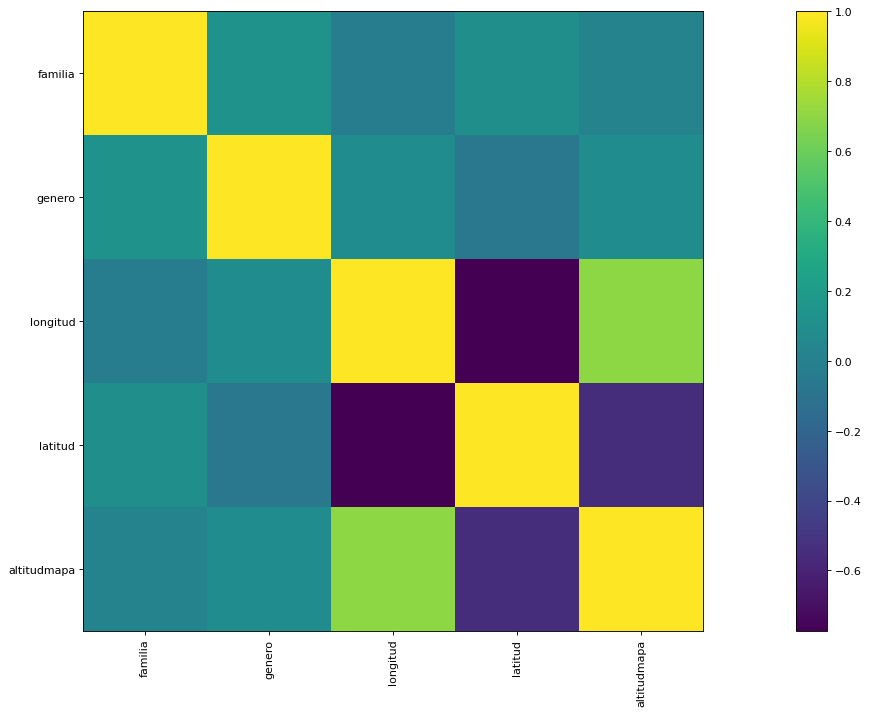

In [20]:
corr = X.corr()
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.show()

In [35]:
# Standardize the data with StandardScaler().
plant_scaled = StandardScaler().fit_transform(X)
print(plant_scaled[0:5])

[[ 0.54961874 -1.38836075  0.80269298 -0.27230707  1.12220141]
 [ 1.0178109   0.95218554  0.33550819  0.27526412  0.24413098]
 [-1.49340156  1.11969078  1.31690979 -1.88906939  0.809464  ]
 [-1.15289817 -1.34761623  0.53931363 -0.81468801  1.63006559]
 [-1.15289817  1.18759832  0.40605623  0.51142041  0.31095521]]


In [36]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
#X_pca = pca.fit_transform(X_scaled)
X_pca = pca.fit_transform(plant_scaled)
X_pca


array([[ 1.09930367, -0.50178654,  1.57302734],
       [ 0.23405216,  1.42456659,  0.03404236],
       [ 2.47922923, -0.51652706, -1.66766426],
       ...,
       [ 2.81534012,  1.95072552,  0.39433104],
       [-1.52124387,  1.25848142,  0.16425354],
       [ 2.78319264,  0.40206405, -1.7193508 ]])

In [37]:
# Create a DataFrame with the three principal components.
pcs_df=pd.DataFrame(
data=X_pca, columns=["PC 1", "PC 2","PC 3"], index = plants_df.index)

pcs_df
    

PC 1      PC 2      PC 3
ID                                  
123147  1.099304 -0.501787  1.573027
127641  0.234052  1.424567  0.034042
103071  2.479229 -0.516527 -1.667664
95344   1.591251 -1.747437  0.447164
98712   0.282272  0.025828 -1.557163
...          ...       ...       ...
67410   1.014451  0.279096 -1.536404
8379    2.754312 -0.818346  0.561976
94265   2.815340  1.950726  0.394331
33282  -1.521244  1.258481  0.164254
4588    2.783193  0.402064 -1.719351

[3958 rows x 3 columns]

In [38]:
pca.explained_variance_ratio_

array([0.47276238, 0.22763125, 0.17233781])

In [39]:
pca.explained_variance_ratio_.cumsum()

array([0.47276238, 0.70039363, 0.87273144])

In [40]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [41]:
# Initialize the K-Means model.
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)


In [42]:
predictions

array([1, 2, 1, ..., 1, 2, 1])

In [43]:
clustered_df= pcs_df.join(X, how="left")
clustered_df

PC 1      PC 2      PC 3  familia  genero  longitud  latitud  \
ID                                                                         
123147  1.099304 -0.501787  1.573027       49      62   -100.77    24.57   
127641  0.234052  1.424567  0.034042       60     579   -103.75    26.68   
103071  2.479229 -0.516527 -1.667664        1     616    -97.49    18.34   
95344   1.591251 -1.747437  0.447164        9      71   -102.45    22.48   
98712   0.282272  0.025828 -1.557163        9     631   -103.30    27.59   
...          ...       ...       ...      ...     ...       ...      ...   
67410   1.014451  0.279096 -1.536404       17     681    -99.44    23.58   
8379    2.754312 -0.818346  0.561976       29     215    -97.45    18.17   
94265   2.815340  1.950726  0.394331       76     654    -97.63    17.68   
33282  -1.521244  1.258481  0.164254       57     496   -115.76    31.68   
4588    2.783193  0.402064 -1.719351       15     767    -97.63    18.23   

        altitudmapa  
ID                   
123147       1843.0  
127641       1186.0  
103071       1609.0  
95344        2223.0  
98712        1236.0  
...             ...  
67410         910.0  
8379         2249.0  
94265        2096.0  
33282        1405.0  
4588         1963.0  

[3958 rows x 8 columns]

In [45]:
#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.

clustered_df["class"] = model.labels_


In [46]:
clustered_df

PC 1      PC 2      PC 3  familia  genero  longitud  latitud  \
ID                                                                         
123147  1.099304 -0.501787  1.573027       49      62   -100.77    24.57   
127641  0.234052  1.424567  0.034042       60     579   -103.75    26.68   
103071  2.479229 -0.516527 -1.667664        1     616    -97.49    18.34   
95344   1.591251 -1.747437  0.447164        9      71   -102.45    22.48   
98712   0.282272  0.025828 -1.557163        9     631   -103.30    27.59   
...          ...       ...       ...      ...     ...       ...      ...   
67410   1.014451  0.279096 -1.536404       17     681    -99.44    23.58   
8379    2.754312 -0.818346  0.561976       29     215    -97.45    18.17   
94265   2.815340  1.950726  0.394331       76     654    -97.63    17.68   
33282  -1.521244  1.258481  0.164254       57     496   -115.76    31.68   
4588    2.783193  0.402064 -1.719351       15     767    -97.63    18.23   

        altitudmapa  class  
ID                          
123147       1843.0      1  
127641       1186.0      2  
103071       1609.0      1  
95344        2223.0      1  
98712        1236.0      1  
...             ...    ...  
67410         910.0      1  
8379         2249.0      1  
94265        2096.0      1  
33282        1405.0      2  
4588         1963.0      1  

[3958 rows x 9 columns]

In [47]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 3",
    y="PC 2",
    z="PC 1",
    color="class",
    symbol="class",
    width=500,
    #hover_name="CoinName",
    #hover_data=["Algorithm"]
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()